In [1]:

using Interpolations, Optim, MAT, SparseArrays
using LaTeXStrings
using Plots
pyplot();

In [2]:
# using https://mark-ponder.com/tutorials/discrete-choice-models/dynamic-discrete-choice-nested-fixed-point-algorithm/
using Revise
includet("Rust_Zurcher.jl")
#include("Rust_Zurcher.jl")
using .Rust

In [3]:
#n =4
#pi =[1/n for i in 1:n]
m = Rust.Model()

Main.Rust.Model(0.9999, [3.6, 10.0], [0.348, 0.639, 0.013], [1.0; 1.0; … ; 1.0; 1.0], 90, 450)

In [4]:
m.π

3-element Vector{Float64}:
 0.348
 0.639
 0.013

In [5]:
Rust.u(m)

2×90 Matrix{Float64}:
  -0.0036   -0.0072   -0.0108   -0.0144  …   -0.3168   -0.3204   -0.324
 -10.0     -10.0     -10.0     -10.0        -10.0     -10.0     -10.0

In [6]:
Rt  = Rust.transition_probs( m );

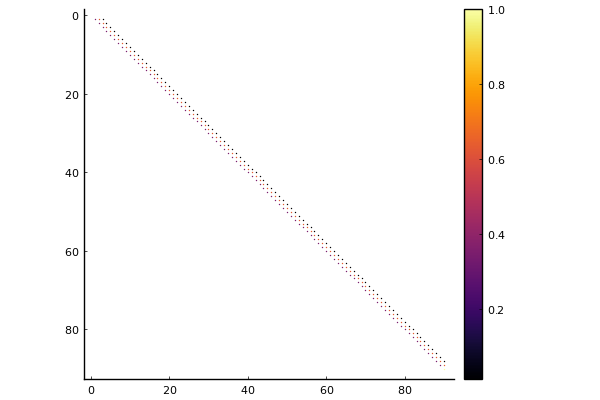

In [7]:
spy(Rt)

In [8]:
Rt

90×90 SparseMatrixCSC{Float64, Int64} with 267 stored entries:
⠙⢷⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠙⢷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠙⢷⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠙⢷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠙⢷⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢷⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢷⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢷⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢷⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢷⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢷⣄⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢷⣀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢷⣄⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢷⣀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢷

In [9]:
Rust.u(m)

2×90 Matrix{Float64}:
  -0.0036   -0.0072   -0.0108   -0.0144  …   -0.3168   -0.3204   -0.324
 -10.0     -10.0     -10.0     -10.0        -10.0     -10.0     -10.0

In [10]:
Rust.ss(m)

90×1 Matrix{Float64}:
 0.9963455626260623
 0.9927457269433596
 0.9891458918532381
 0.9855460573578348
 0.9819462234592943
 0.9783463901597689
 0.9747465574614187
 0.9711467253664117
 0.9675468938769238
 0.9639470629951384
 0.9603472327232471
 0.956747403063449
 0.9531475740179517
 ⋮
 0.7155603330708042
 0.7119605506546994
 0.7083607690232607
 0.7047609881793178
 0.7011612081257101
 0.6975614288652876
 0.6939616504009108
 0.6903618727354501
 0.6867620958717868
 0.6831623198128118
 0.6795625445614268
 0.6759627701205442

In [11]:

Rust.contraction_mapping(m)

println(m.EV)

[-1718.2881323142492; -1718.5377207873223; -1718.781955756104; -1719.0208422225282; -1719.2543864455577; -1719.4825961571676; -1719.705480801724; -1719.923051798156; -1720.1353228234884; -1720.3423101153749; -1720.544032790238; -1720.7405131725777; -1720.931777129933; -1721.1178544069787; -1721.2987789513484; -1721.474589223069; -1721.6453284790239; -1721.811045023688; -1721.9717924175698; -1722.1276296353158; -1722.278621166352; -1722.4248370522023; -1722.5663528561947; -1722.703249563083; -1722.8356134080884; -1722.963535636917; -1723.0871122003139; -1723.2064433885848; -1723.321633413166; -1723.4327899436662; -1723.5400236097998; -1723.6434474782236; -1723.743176514517; -1723.839327040375; -1723.9320161955873; -1724.0213614135926; -1724.1074799183864; -1724.190488249393; -1724.2705018196593; -1724.34763451143; -1724.421998311922; -1724.4937029909088; -1724.5628558206522; -1724.629561337765; -1724.6939211457677; -1724.7560337564664; -1724.8159944677186; -1724.8738952748142; -1724.929

In [12]:
Rust.choice_p(m)'

1×90 adjoint(::Matrix{Float64}) with eltype Float64:
 0.999954  0.999941  0.999925  0.999904  …  0.861236  0.860137  0.859518

In [13]:
## Data 
#rust_data = matread(dirname(pwd()) * "\\zurcher_matlab\\busdata1234.mat")
# mat data version is too old 

In [14]:
using MAT, DataFrames

In [15]:
#rust_data = matopen(dirname(pwd()) * "\\zurcher_matlab\\busdata1234.mat")
rust_data = matread(pwd() * "\\data\\zurcher.mat")

Dict{String, Any} with 1 entry:
  "data" => [4403.0 1.0 … 504.0 504.0; 4403.0 1.0 … 2705.0 2201.0; … ; 5333.0 4…

In [16]:
df  = DataFrame(rust_data["data"],:auto)
#names!(df,[:id,:bustype,:d1,])
column_dict = Dict(:x1=>:id, :x2 => :bustype, :x5 => :d1 , :x7=> :x )
rename!(df,column_dict)
df[1:10,:]

,id,bustype,x3,x4,d1,x6,x,x8,x9
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,4403.0,1.0,83.0,5.0,0.0,0.0,504.0,504.0,504.0
2,4403.0,1.0,83.0,6.0,0.0,504.0,2705.0,2705.0,2201.0
3,4403.0,1.0,83.0,7.0,0.0,2705.0,7345.0,7345.0,4640.0
4,4403.0,1.0,83.0,8.0,0.0,7345.0,11591.0,11591.0,4246.0
5,4403.0,1.0,83.0,9.0,0.0,11591.0,16057.0,16057.0,4466.0
6,4403.0,1.0,83.0,10.0,0.0,16057.0,20796.0,20796.0,4739.0
7,4403.0,1.0,83.0,11.0,0.0,20796.0,25299.0,25299.0,4503.0
8,4403.0,1.0,83.0,12.0,0.0,25299.0,29311.0,29311.0,4012.0
9,4403.0,1.0,84.0,1.0,0.0,29311.0,34621.0,34621.0,5310.0


In [17]:
df = df[:,[x for x in values(column_dict)]]
# turn lagged replacement dummy into replacement dummy
df[:,:d] = [df[2:end,:d1] ; 0 ]; 
df[1:10,:]

,bustype,d1,x,id,d
,Float64,Float64,Float64,Float64,Float64
1,1.0,0.0,504.0,4403.0,0.0
2,1.0,0.0,2705.0,4403.0,0.0
3,1.0,0.0,7345.0,4403.0,0.0
4,1.0,0.0,11591.0,4403.0,0.0
5,1.0,0.0,16057.0,4403.0,0.0
6,1.0,0.0,20796.0,4403.0,0.0
7,1.0,0.0,25299.0,4403.0,0.0
8,1.0,0.0,29311.0,4403.0,0.0
9,1.0,0.0,34621.0,4403.0,0.0


In [18]:
df[1:end-1,:id]

8259-element Vector{Float64}:
 4403.0
 4403.0
 4403.0
 4403.0
 4403.0
 4403.0
 4403.0
 4403.0
 4403.0
 4403.0
 4403.0
 4403.0
 4403.0
    ⋮
 5333.0
 5333.0
 5333.0
 5333.0
 5333.0
 5333.0
 5333.0
 5333.0
 5333.0
 5333.0
 5333.0
 5333.0

In [19]:
rd  = Rust.Data(df,m)

Main.Rust.Data(Int32[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Int32[1, 2, 3, 4, 5, 6, 6, 7, 8, 9  …  67, 68, 68, 68, 69, 69, 69, 70, 70, 70])

In [20]:
sum(rd.exog .== 0)

0

In [22]:
optimum = Rust.ll(m,rd)

 * Status: success

 * Candidate solution
    Final objective value:     3.002538e+02

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   77  (vs limit Inf)
    Iterations:    34
    f(x) calls:    69
